In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
# Set random seed for reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)

# Load Data

In [3]:
df = pd.read_excel('3-2396_phytos_with_SMILES_ChEMBL_Activities_TTD_Unit_4_Targets_MACCS_FP_Disease16may25.xlsx')
df

,ChEMBL ID,Target/Cell lines,Phytochemicals,Inchikeys,Diseases,Inchi,SMILES,Target,MACCS_Bit_1,MACCS_Bit_2,...,MACCS_Bit_157,MACCS_Bit_158,MACCS_Bit_159,MACCS_Bit_160,MACCS_Bit_161,MACCS_Bit_162,MACCS_Bit_163,MACCS_Bit_164,MACCS_Bit_165,MACCS_Bit_166
0,CHEMBL256,adenosine a3 receptor,Propanol,BDERNNFJNOPAEC-UHFFFAOYSA-N,Cerebral ischaemia,BDERNNFJNOPAEC-UHFFFAOYSA-N,CCCO,Anticancer,0,0,...,1,0,0,1,0,0,0,1,0,0
1,CHEMBL1871,androgen receptor,"2-butanamine, (s)-",BHRZNVHARXXAHW-BYPYZUCNSA-N,Acne vulgaris,BHRZNVHARXXAHW-BYPYZUCNSA-N,CC[C@H](C)N,Anticancer,0,0,...,0,1,0,1,1,0,0,0,0,0
2,CHEMBL1871,androgen receptor,1-(trans-4'-hydroxy-3'-methoxycinnamoylamino)-...,UBMDAKWARMURDL-FNORWQNLSA-N,Acne vulgaris,UBMDAKWARMURDL-FNORWQNLSA-N,COC1=C(C=CC(=C1)C=CC(=O)NCCCCN=C(N)N)O,Anticancer,0,0,...,1,1,1,1,1,1,1,1,1,0
3,CHEMBL1871,androgen receptor,1-dodecene,CRSBERNSMYQZNG-UHFFFAOYSA-N,Acne vulgaris,CRSBERNSMYQZNG-UHFFFAOYSA-N,CCCCCCCCCCC=C,Anticancer,0,0,...,0,0,0,1,0,0,0,0,0,0
4,CHEMBL1871,androgen receptor,"2-ethyl-3,5-dimethylpyrazine",JZBCTZLGKSYRSF-UHFFFAOYSA-N,Acne vulgaris,JZBCTZLGKSYRSF-UHFFFAOYSA-N,CCC1=NC=C(N=C1C)C,Anticancer,0,0,...,0,0,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,CHEMBL1906,serine/threonine-protein kinase raf,Withastramonolide,ZYXVOZNURJLMFP-BNNRDBEOSA-N,Melanoma,ZYXVOZNURJLMFP-BNNRDBEOSA-N,CC1=C(C(=O)O[C@H](C1)[C@@H](C)[C@H]2CC[C@@H]3[...,neuromuscular disorders,0,0,...,1,0,1,1,0,0,1,1,1,0
2392,CHEMBL1906,serine/threonine-protein kinase raf,Yamogenin,WQLVFSAGQJTQCK-CAKNJAFZSA-N,Melanoma,WQLVFSAGQJTQCK-CAKNJAFZSA-N,C[C@H]1CC[C@@]2([C@H]([C@H]3[C@@H](O2)C[C@@H]4...,neuromuscular disorders,0,0,...,1,0,1,1,0,0,1,1,1,0
2393,CHEMBL1906,serine/threonine-protein kinase raf,Ylangene,VLXDPFLIRFYIME-QRTUWBSPSA-N,Melanoma,VLXDPFLIRFYIME-QRTUWBSPSA-N,CC1=CC[C@@H]2[C@@H]3[C@H]1[C@]2(CC[C@H]3C(C)C)C,neuromuscular disorders,0,0,...,0,0,0,1,0,0,1,0,1,0
2394,CHEMBL1906,serine/threonine-protein kinase raf,Yuccagenin,ORXKASWXOVPKDV-UBWBUNFISA-N,Melanoma,ORXKASWXOVPKDV-UBWBUNFISA-N,C[C@@H]1CC[C@@]2([C@H]([C@H]3[C@@H](O2)C[C@@H]...,neuromuscular disorders,0,0,...,1,0,1,1,0,0,1,1,1,0


In [4]:
df['Target'].value_counts()

Target
Antivirals                 1390
Antidiabetes                581
neuromuscular disorders     221
Anticancer                  204
Name: count, dtype: int64

# Splitting into Features and Target

In [5]:
df.columns

Index(['ChEMBL ID', 'Target/Cell lines', 'Phytochemicals', 'Inchikeys',
       'Diseases', 'Inchi', 'SMILES', 'Target', 'MACCS_Bit_1', 'MACCS_Bit_2',
       ...
       'MACCS_Bit_157', 'MACCS_Bit_158', 'MACCS_Bit_159', 'MACCS_Bit_160',
       'MACCS_Bit_161', 'MACCS_Bit_162', 'MACCS_Bit_163', 'MACCS_Bit_164',
       'MACCS_Bit_165', 'MACCS_Bit_166'],
      dtype='object', length=174)

In [6]:
filtered_df = df.drop(['ChEMBL ID', 'Target/Cell lines', 'Phytochemicals', 'Inchikeys',
       'Diseases', 'Inchi', 'SMILES'], axis=1)
filtered_df

,Target,MACCS_Bit_1,MACCS_Bit_2,MACCS_Bit_3,MACCS_Bit_4,MACCS_Bit_5,MACCS_Bit_6,MACCS_Bit_7,MACCS_Bit_8,MACCS_Bit_9,...,MACCS_Bit_157,MACCS_Bit_158,MACCS_Bit_159,MACCS_Bit_160,MACCS_Bit_161,MACCS_Bit_162,MACCS_Bit_163,MACCS_Bit_164,MACCS_Bit_165,MACCS_Bit_166
0,Anticancer,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,Anticancer,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
2,Anticancer,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,Anticancer,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Anticancer,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2392,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0
2393,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2394,neuromuscular disorders,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,1,1,0


In [7]:
X = filtered_df.drop(['Target'],axis=1)
y = filtered_df['Target']

# Importing Libraries

In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix

# Importing Algorithm

In [9]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

# Target Encoding

In [10]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y is your original categorical target
y_encoded

array([0, 0, 0, ..., 3, 3, 3], shape=(2396,))

In [11]:
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'Anticancer': 0, 'Antidiabetes': 1, 'Antivirals': 2, 'neuromuscular disorders': 3}


# Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,test_size=0.20, stratify = y_encoded,random_state=random_seed)


# Hyperparameter tuning

In [13]:
import optuna

E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "max_bins": trial.suggest_int("max_bins", 64, 512),
        "max_interaction_bins": trial.suggest_int("max_interaction_bins", 64, 512),
        "interactions": trial.suggest_int("interactions", 0, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 50),
        "max_leaves": trial.suggest_int("max_leaves", 2, 50)
        # "random_state": 42,
    }

    # Initialize EBM model
    ebm = ExplainableBoostingClassifier(**params, random_state=random_seed)

    # 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    scores = cross_val_score(ebm, X_train, y_train, cv=cv, scoring='accuracy')

    return np.mean(scores)

# Run Optuna study
sampler = optuna.samplers.TPESampler(seed=random_seed)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=50, timeout=600)

# Print best trial
print("Best Trial:")
print("Value:", study.best_trial.value)
print("Params:", study.best_trial.params)

[I 2025-05-16 16:12:27,096] A new study created in memory with name: no-name-849d91ad-0c56-467b-ab8e-bff630f3ae61
E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:1173: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(
E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:1173: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multic

Best Trial:
Value: 0.7881024260226284
Params: {'max_bins': 501, 'max_interaction_bins': 304, 'interactions': 4, 'learning_rate': 0.010368280137472605, 'min_samples_leaf': 34, 'max_leaves': 36}


# Best Parameters

In [15]:
best_params = study.best_trial.params
best_params

{'max_bins': 501,
 'max_interaction_bins': 304,
 'interactions': 4,
 'learning_rate': 0.010368280137472605,
 'min_samples_leaf': 34,
 'max_leaves': 36}

# Model Training

In [16]:
# Train final model
final_model = ExplainableBoostingClassifier(**best_params, random_state=random_seed)
final_model.fit(X_train, y_train)

E:\HILLUL\Project Associate - I\HF-for-ML\ML-Modelling\hf_env\Lib\site-packages\interpret\glassbox\_ebm\_ebm.py:1173: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions only have local explanations. They are not currently displayed in the global explanation visualizations. Set interactions=0 to disable this warning. If you still want multiclass interactions, this API accepts a list, and the measure_interactions function can be used to detect them.
  warn(


ExplainableBoostingClassifier(interactions=4,
                              learning_rate=0.010368280137472605, max_bins=501,
                              max_interaction_bins=304, max_leaves=36,
                              min_samples_leaf=34)

# Training Set Performance

In [22]:
print('Training Set Performance')

y_train_pred = final_model.predict(X_train)
train_cr = classification_report(y_train,y_train_pred)

print(train_cr)

Training Set Performance
              precision    recall  f1-score   support

           0       0.68      0.31      0.42       163
           1       0.82      0.82      0.82       465
           2       0.84      0.94      0.89      1111
           3       0.72      0.58      0.64       177

    accuracy                           0.82      1916
   macro avg       0.76      0.66      0.69      1916
weighted avg       0.81      0.82      0.81      1916



## Conversion of Train Performance to Table

In [30]:
lines = [ line.split() for line in train_cr.split('\n') if len(line)!=0]
cr_df = pd.DataFrame(lines)

# Shift only the values of row with index 1 to the right by 1 unit
row_index = 0
cr_df.iloc[row_index] = cr_df.iloc[row_index].shift(periods=1)

# Set the first row as the header
cr_df.columns = cr_df.iloc[0]  # Assign first row as column names
cr_df = cr_df.drop(0)  # Drop the first row
cr_df = cr_df.reset_index(drop=True)  # Optional: Reset index to start from 0
cr_df = cr_df.iloc[:,:5]
cr_df

,None,precision,recall,f1-score,support
0,0,0.68,0.31,0.42,163
1,1,0.82,0.82,0.82,465
2,2,0.84,0.94,0.89,1111
3,3,0.72,0.58,0.64,177
4,accuracy,0.82,1916,None,None
5,macro,avg,0.76,0.66,0.69
6,weighted,avg,0.81,0.82,0.81


In [31]:
cr_df = cr_df.rename(columns= {None:"Target"})
cr_df['Accuracy'] = cr_df.loc[4,'precision']
cr_df['Total_Samples'] = cr_df.loc[4,'recall']
cr_df = cr_df.iloc[:4,:]
cr_df

,Target,precision,recall,f1-score,support,Accuracy,Total_Samples
0,0,0.68,0.31,0.42,163,0.82,1916
1,1,0.82,0.82,0.82,465,0.82,1916
2,2,0.84,0.94,0.89,1111,0.82,1916
3,3,0.72,0.58,0.64,177,0.82,1916


In [32]:
# Function to find a single key by value
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

In [33]:
cr_df['Algorithm'] = 'EBM'
cr_df = cr_df[['Algorithm','Total_Samples', 'Accuracy', 'Target', 'support','precision', 'recall', 'f1-score']]
cr_df['Target'] = cr_df['Target'].apply(lambda x: get_key_by_value(label_mapping, int(x) ))
cr_df = cr_df.rename(columns = {'support': 'sample_counts'})
cr_df

,Algorithm,Total_Samples,Accuracy,Target,sample_counts,precision,recall,f1-score
0,EBM,1916,0.82,Anticancer,163,0.68,0.31,0.42
1,EBM,1916,0.82,Antidiabetes,465,0.82,0.82,0.82
2,EBM,1916,0.82,Antivirals,1111,0.84,0.94,0.89
3,EBM,1916,0.82,neuromuscular disorders,177,0.72,0.58,0.64


# Test Set Performance

In [35]:
print('Testing Set Performance')

#labels_present = np.unique(y_remaining_encoded)
y_pred = final_model.predict(X_test)

test_cr = classification_report(y_test , y_pred # , labels=labels_present
                          )
print(test_cr)

Testing Set Performance
              precision    recall  f1-score   support

           0       0.52      0.27      0.35        41
           1       0.77      0.74      0.76       116
           2       0.82      0.92      0.87       279
           3       0.54      0.43      0.48        44

    accuracy                           0.78       480
   macro avg       0.67      0.59      0.62       480
weighted avg       0.76      0.78      0.76       480



## Conversion of Test Performance to Table

In [36]:
lines = [ line.split() for line in test_cr.split('\n') if len(line)!=0]
cr_df = pd.DataFrame(lines)

# Shift only the values of row with index 1 to the right by 1 unit
row_index = 0
cr_df.iloc[row_index] = cr_df.iloc[row_index].shift(periods=1)

# Set the first row as the header
cr_df.columns = cr_df.iloc[0]  # Assign first row as column names
cr_df = cr_df.drop(0)  # Drop the first row
cr_df = cr_df.reset_index(drop=True)  # Optional: Reset index to start from 0
cr_df = cr_df.iloc[:,:5]
cr_df

,None,precision,recall,f1-score,support
0,0,0.52,0.27,0.35,41
1,1,0.77,0.74,0.76,116
2,2,0.82,0.92,0.87,279
3,3,0.54,0.43,0.48,44
4,accuracy,0.78,480,None,None
5,macro,avg,0.67,0.59,0.62
6,weighted,avg,0.76,0.78,0.76


In [37]:
cr_df = cr_df.rename(columns= {None:"Target"})
cr_df['Accuracy'] = cr_df.loc[4,'precision']
cr_df['Total_Samples'] = cr_df.loc[4,'recall']
cr_df = cr_df.iloc[:4,:]
cr_df

,Target,precision,recall,f1-score,support,Accuracy,Total_Samples
0,0,0.52,0.27,0.35,41,0.78,480
1,1,0.77,0.74,0.76,116,0.78,480
2,2,0.82,0.92,0.87,279,0.78,480
3,3,0.54,0.43,0.48,44,0.78,480


In [38]:
# Function to find a single key by value
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

In [40]:
cr_df['Algorithm'] = 'EBM'
cr_df = cr_df[['Algorithm','Total_Samples', 'Accuracy', 'Target', 'support','precision', 'recall', 'f1-score']]
cr_df['Target'] = cr_df['Target'].apply(lambda x: get_key_by_value(label_mapping, int(x) ))
cr_df = cr_df.rename(columns = {'support': 'sample_counts'})
cr_df

,Algorithm,Total_Samples,Accuracy,Target,sample_counts,precision,recall,f1-score
0,EBM,480,0.78,Anticancer,41,0.52,0.27,0.35
1,EBM,480,0.78,Antidiabetes,116,0.77,0.74,0.76
2,EBM,480,0.78,Antivirals,279,0.82,0.92,0.87
3,EBM,480,0.78,neuromuscular disorders,44,0.54,0.43,0.48


In [41]:
cr_df.to_excel('EBM_Test_Set_Evaluation_Metrics.xlsx',index=False)

## Visualizing Confusion Confusion Matrix

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 11,  11,  16,   3],
       [  4,  86,  21,   5],
       [  3,  11, 257,   8],
       [  3,   3,  19,  19]])

In [44]:
class_names = list(label_mapping.keys())
class_names

['Anticancer', 'Antidiabetes', 'Antivirals', 'neuromuscular disorders']

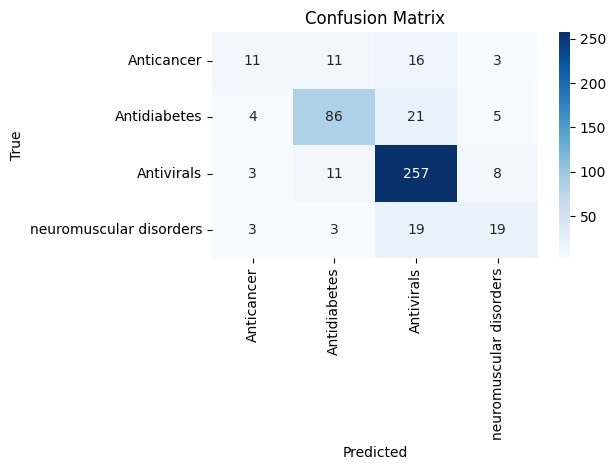

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('EBM_Confusion_Matrix.png',dpi=600)
plt.show()

# ROC AUC

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [55]:
n_classes = len(label_mapping)
y_test_bin = label_binarize(y_test, classes=list(label_mapping.values()))

# Get probability scores
y_score = final_model.predict_proba(X_test)

In [56]:
# Compute ROC curve and AUC for each class (OvR)
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


0
1
2
3


In [57]:
n_classes

4

In [58]:
# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [59]:
# Compute macro-average ROC curve and AUC
# First, average FPR and TPR
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)


for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

0
1
2
3


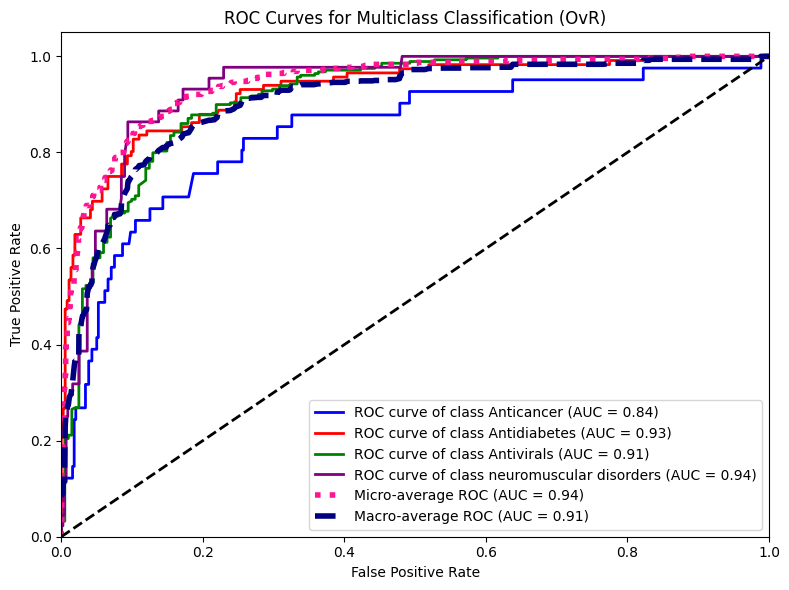

In [63]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green','purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot micro-average ROC
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', lw=4,
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})')

# Plot macro-average ROC
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle='--', lw=4,
         label=f'Macro-average ROC (AUC = {roc_auc["macro"]:.2f})')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification (OvR)')
plt.legend(loc="lower right")
plt.grid(False)
plt.tight_layout()
plt.savefig('EBM_AUC_ROC.png',dpi=600)
plt.show()
